<a href="https://colab.research.google.com/github/ANCYMICHAEL/College_Projects/blob/main/Model3_implem_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import os
#Reading training set and test set
import cv2

In [ ]:

from tqdm import tqdm
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import cv2
from PIL import Image
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing import image
import tensorflow as tf

In [ ]:
import csv
 
# csv file name
filename = "train.csv"
 
# initializing the titles and rows list
fields = []
rows = []
 
# reading csv file
with open(filename, 'r') as csvfile:
    # creating a csv reader object
    csvreader = csv.reader(csvfile)
     
    # extracting field names through first row
    fields = next(csvreader)
 
    # extracting each data row one by one
    for row in csvreader:
        rows.append(row)
 

    # get total number of rows
    print("Total no. of rows: %d"%(csvreader.line_num))
 
# printing the field names
data_dir="train/";
data = [] 
labels = ['0', '1','2','3','4','5','6']
img_size = 299
print('Field names are:' + ', '.join(field for field in fields))
df=pd.DataFrame(columns=['fname','label'])
#  printing first 5 rows
l=csvreader.line_num

k=1;
for row in rows[:1000]:
    # parsing each column of a row
    filename=row[0]
    lab=""
    if( row[1]=='1.0'):
        lab="0"
    if( row[2]=='1.0'):
        lab="1"
    if( row[3]=='1.0'):
        lab="2"
    if( row[4]=='1.0'):
        lab="3"
    if( row[5]=='1.0'):
        lab="4"
    if( row[6]=='1.0'):
        lab="5"
    if( row[7]=='1.0'):
        lab="6"
    
    s=os.path.join( data_dir,filename)+".jpg"
    #start loop with an image(preprocessed)
    try:
        print(s) 
       
        data.append([filename, lab])

        df.loc[k] =filename,lab
        k=k+1
        print('\n')
    except Exception as e:
                print(e)       
train=np.array(df)
X=train
print(df)


FileNotFoundError: ignored

In [ ]:

  
# saving the dataframe
df.to_csv('reference.csv')

train_df = pd.read_csv('reference.csv')
test_df = pd.read_csv('reference.csv')
print(train_df.shape)
print(test_df.shape)
train_df.head()



(1000, 3)
(1000, 3)


,Unnamed: 0,fname,label
0,1,ISIC_0024306,1
1,2,ISIC_0024307,1
2,3,ISIC_0024308,1
3,4,ISIC_0024309,1
4,5,ISIC_0024310,0


1    685
4    111
0     91
2     52
3     36
6     14
5     11
Name: label, dtype: int64

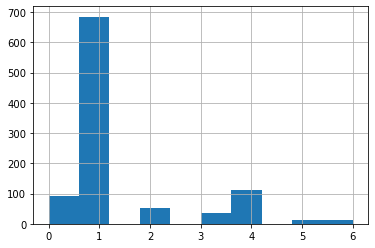

In [ ]:
train_df['label'].hist()
train_df['label'].value_counts()

In [ ]:
#define  a function to resample an image an compute eugen value to be stored in shape array
def preprocess_image(image_path, desired_size=299):
    im=shifting(image_path)
    im = Image.open(image_path)
    
    gray=grayscale(im)
    im = im.resize((desired_size, )*2, resample=Image.LANCZOS)
    pca_img=PCA(image_path)
    return im

def grayscale(bigger):
    image3 = np.array(bigger)
  
    
    gray_image = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
    #print (gray_image)
    
    return(gray_image)
#resizing image
def resize(res):
    import matplotlib.pyplot as plt
    image =res
    half = cv2.resize(image, (0, 0), fx = 0.7, fy = 0.7)
    bigger = cv2.resize(image, (300, 300))
    stretch_near = cv2.resize(image, (780, 540), interpolation = cv2.INTER_NEAREST)
    return(bigger)

def shifting(FILE_NAME):
    M = np.float32([[1, 0, 0], [0, 1, 50]])
    try:
        img = cv2.imread(FILE_NAME)
        (rows, cols) = img.shape[:2]
        res = cv2.warpAffine(img, M, (cols, rows))
        
        return(res)
    except IOError:
        print ('Error while reading files !!!')
def PCA( FILE_NAME):
    import cv2
    import numpy as np
    from sklearn.decomposition import PCA
    pca = PCA(n_components = 0.96)
    img = cv2.imread(FILE_NAME)
    shape = img.shape
    img_r = img.reshape((shape[0], shape[1] * shape[2]))
    reduced = pca.fit_transform(img_r)

    

In [ ]:
#take and store each training data in X array for a particular diagonosis type( 0).. for eg X_0

x_0 = np.empty((len(train_df[train_df['label'] == 0]), 299, 299, 3), dtype=np.uint8)

for i, fname in enumerate(tqdm(train_df[train_df['label'] == 0]['fname'])):
    x_0[i, :, :, :] = preprocess_image(
        f'train//{fname}.jpg'
    )

100%|██████████████████████████████████████████████████████████████████████████████████| 91/91 [00:28<00:00,  3.21it/s]


In [ ]:
x_1 = np.empty((len(train_df[train_df['label'] == 1]), 299, 299, 3), dtype=np.uint8)

for i, fname in enumerate(tqdm(train_df[train_df['label'] == 1]['fname'])):
    x_1[i, :, :, :] = preprocess_image(
        f'train//{fname}.jpg'
    )

100%|████████████████████████████████████████████████████████████████████████████████| 685/685 [03:26<00:00,  3.32it/s]


In [ ]:
x_2 = np.empty((len(train_df[train_df['label'] == 2]), 299, 299, 3), dtype=np.uint8)

for i, fname in enumerate(tqdm(train_df[train_df['label'] == 2]['fname'])):
    x_2[i, :, :, :] = preprocess_image(
        f'train//{fname}.jpg'
    )

100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:15<00:00,  3.35it/s]


In [ ]:
x_3 = np.empty((len(train_df[train_df['label'] == 3]), 299, 299, 3), dtype=np.uint8)

for i, fname in enumerate(tqdm(train_df[train_df['label'] == 3]['fname'])):
    x_3[i, :, :, :] = preprocess_image(
        f'train//{fname}.jpg'
    )

100%|██████████████████████████████████████████████████████████████████████████████████| 36/36 [00:10<00:00,  3.31it/s]


In [ ]:
x_4 = np.empty((len(train_df[train_df['label'] == 4]), 299, 299, 3), dtype=np.uint8)

for i, fname in enumerate(tqdm(train_df[train_df['label'] == 4]['fname'])):
    x_4[i, :, :, :] = preprocess_image(
        f'train//{fname}.jpg'
    )

100%|████████████████████████████████████████████████████████████████████████████████| 111/111 [00:33<00:00,  3.33it/s]


In [ ]:
x_5 = np.empty((len(train_df[train_df['label'] == 5]), 299, 299, 3), dtype=np.uint8)

for i, fname in enumerate(tqdm(train_df[train_df['label'] == 5]['fname'])):
    x_5[i, :, :, :] = preprocess_image(
        f'train//{fname}.jpg'
    )

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:03<00:00,  3.19it/s]


In [ ]:
x_6 = np.empty((len(train_df[train_df['label'] == 6]), 299, 299, 3), dtype=np.uint8)

for i, fname in enumerate(tqdm(train_df[train_df['label'] == 6]['fname'])):
    x_6[i, :, :, :] = preprocess_image(
        f'train//{fname}.jpg'
    )

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.18it/s]


In [ ]:
#take and store each training data in Y array for  diagonosis type4
y_0 = np.expand_dims(train_df[train_df['label'] == 0]['label'],1)
y_1 = np.expand_dims(train_df[train_df['label'] == 1]['label'],1)
y_2 = np.expand_dims(train_df[train_df['label'] == 2]['label'],1)
y_3 = np.expand_dims(train_df[train_df['label'] == 3]['label'],1)
y_4 = np.expand_dims(train_df[train_df['label'] == 4]['label'],1)
y_5 = np.expand_dims(train_df[train_df['label'] == 5]['label'],1)
y_6 = np.expand_dims(train_df[train_df['label'] == 6]['label'],1)
print(y_1.shape, y_2.shape)


(685, 1) (52, 1)


In [ ]:
X_tr = np.vstack((x_0,x_1,x_2,x_3,x_4,x_5,x_6))

Y_tr = np.vstack((y_0,y_1,y_2,y_3,y_4,y_5,y_6))
print(X_tr.shape,Y_tr.shape)


(1000, 299, 299, 3) (1000, 1)


In [ ]:
#joing original samples and smot applied y samples
labels = np.vstack((y_0,y_1,y_2,y_3,y_4,y_5,y_6))
Y_tr = np.vstack((y_0,y_1,y_2,y_3,y_4,y_5,y_6))


In [ ]:
#select unique values from np array and save it in y_train as indicators
y_train = pd.get_dummies(np.squeeze(labels)).values
print(X_tr.shape)
print(y_train.shape)

(1000, 299, 299, 3)
(1000, 7)


In [ ]:
# y_train is changed to y_train_multi to hold multilabels... for that an array element is rewritten using for loop
y_train_multi = np.empty(y_train.shape, dtype=y_train.dtype)
y_train_multi[:, 4] = y_train[:, 4]

for i in range(3, -1, -1):
    y_train_multi[:, i] = np.logical_or(y_train[:, i], y_train_multi[:, i+1])

print("Original y_train:", y_train.sum(axis=0))
print("Multilabel version:", y_train_multi.sum(axis=0))

#using scikit_learn, splt dataset x_tr, y_train_multi into Traning and \Testsets
#x_train, x_val, y_train, y_val = train_test_split(    X_tr, y_train_multi,    test_size=0.35, random_state=2019)

Original y_train: [ 91 685  52  36 111  11  14]
Multilabel version: [   975    884    199    147    111 130932 131730]


In [ ]:
#using scikit_learn, splt dataset x_tr, y_train_multi into Traning and \Testsets
x_train, x_val, y_train, y_val = train_test_split(
    X_tr, Y_tr, 
    test_size=0.39, 
    random_state=2019
)

mx_train, mx_val, my_train, my_val = train_test_split(
    X_tr, y_train_multi, 
    test_size=0.25, 
    random_state=12, shuffle= True
)

print(y_train.shape,x_train.shape,X_tr.shape,x_val.shape,y_val.shape)

(610, 1) (610, 299, 299, 3) (1000, 299, 299, 3) (390, 299, 299, 3) (390, 1)


In [ ]:
#save to numpy array
np.save('x_train',x_train)
np.save('x_val',x_val)
np.save('y_train',y_train)
np.save('y_val',y_val)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(610, 299, 299, 3)
(610, 1)
(390, 299, 299, 3)
(390, 1)


In [ ]:
#load saved image from np array to DataFrame
x_train = np.load('x_train.npy')
x_val = np.load('x_val.npy')
y_train = np.load('y_train.npy')
y_val = np.load('y_val.npy')

In [ ]:
print(x_val.shape)
print(y_val.shape)
print(x_train.shape)
print(y_train.shape)

(390, 299, 299, 3)
(390, 1)
(610, 299, 299, 3)
(610, 1)


In [ ]:

model_new = InceptionV3(weights=None)

In [ ]:
model_new.summary()
model_new = Sequential([ model_new, Dense(7, activation='relu') ])
model_new.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 17, 17, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [ ]:
# adding more layers in Model3
model_new1 = Sequential ([model_new, Dense (64,  activation="sigmoid")]) # putting batch optimisation
model_new1 = Sequential([ model_new1, Dense(16, activation='relu') ])  
model_new1 = Sequential([ model_new, Dense(7, activation='relu') ])
model_new1.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")
model_new1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 7)                 23858791  
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
Total params: 23,858,847
Trainable params: 23,824,415
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
 print(X_tr,y_train)

[[[[ 71  34  37]
   [ 72  33  40]
   [ 72  31  39]
   ...
   [ 74  29  32]
   [ 76  30  33]
   [ 78  29  32]]

  [[ 71  33  37]
   [ 71  33  38]
   [ 72  32  38]
   ...
   [ 76  30  32]
   [ 76  30  32]
   [ 75  30  32]]

  [[ 72  32  36]
   [ 72  34  36]
   [ 71  33  37]
   ...
   [ 77  31  34]
   [ 76  30  33]
   [ 75  30  34]]

  ...

  [[ 77  34  43]
   [ 76  35  43]
   [ 79  34  41]
   ...
   [ 72  32  43]
   [ 72  33  42]
   [ 71  32  41]]

  [[ 75  35  38]
   [ 78  35  41]
   [ 76  34  41]
   ...
   [ 72  32  47]
   [ 71  32  44]
   [ 73  32  42]]

  [[ 77  34  39]
   [ 76  34  39]
   [ 76  34  38]
   ...
   [ 73  31  47]
   [ 71  33  44]
   [ 72  33  42]]]


 [[[186 139 151]
   [187 139 154]
   [187 141 155]
   ...
   [186 139 155]
   [184 137 153]
   [183 136 152]]

  [[186 141 154]
   [186 144 156]
   [186 143 155]
   ...
   [184 137 153]
   [183 136 152]
   [181 134 150]]

  [[189 147 160]
   [191 149 159]
   [194 152 163]
   ...
   [183 137 153]
   [184 136 152]
   [181 134

In [ ]:
#history = model_new.fit(X_train, y_train,epochs = 1 , validation_data = (X_val, y_val))
tf.config.optimizer.set_jit(True)

#history = model.fit(x_train,y_train,epochs = 2 , validation_data = (x_val, y_val)) # changed epochs to 10 , old 50
history = model_new.fit(mx_train,my_train,epochs = 2 , validation_data = (mx_val, my_val),verbose=1) # changed epochs to 10 , old 50
   
  #history = model_new.fit(x_val,y_val,epochs = 2) # changed epochs to 10 , old 50


Epoch 1/2
24/24 [==============================] - 827s 29s/step - loss: 595.9019 - accuracy: 0.4587 - val_loss: 223.2957 - val_accuracy: 0.4800
Epoch 2/2
24/24 [==============================] - 443s 18s/step - loss: 218.3262 - accuracy: 0.5067 - val_loss: 223.5061 - val_accuracy: 0.4800


In [ ]:


loss,accuracy=model_new.evaluate(mx_train,my_train,verbose=1)


20/20 [==============================] - 120s 6s/step - loss: 502.6266 - accuracy: 0.0000e+00


In [ ]:
print(x_val.shape, y_val.shape)
print(x_train.shape,y_train.shape)

(390, 299, 299, 3) (390, 1)
(610, 299, 299, 3) (610, 1)


In [ ]:
tf.config.optimizer.set_jit(True)
predict = model_new.predict(x_val)
print(predict)

[[0.         0.         0.         ... 0.         0.         0.00700906]
 [0.         0.         0.         ... 0.         0.         0.00700906]
 [0.         0.         0.         ... 0.         0.         0.00700906]
 ...
 [0.         0.         0.         ... 0.         0.         0.00700906]
 [0.         0.         0.         ... 0.         0.         0.00700906]
 [0.         0.         0.         ... 0.         0.         0.00700906]]


In [ ]:
import matplotlib.pyplot as plt

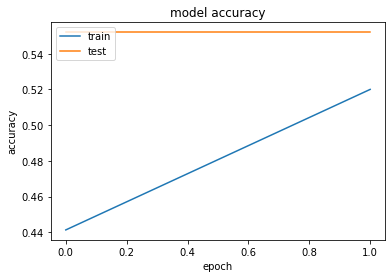

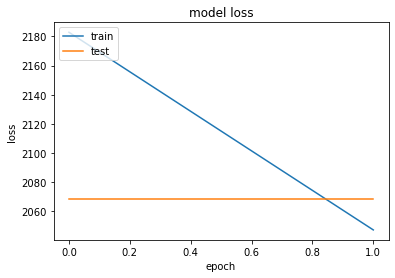

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


In [ ]:
print(classes_pred.shape,y_val.shape)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_val,classes_pred)


(390,) (390, 1)


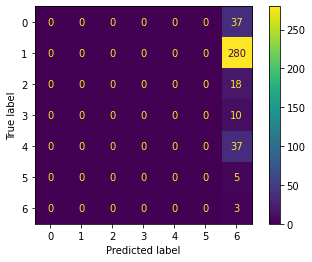

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

cm1=pd.DataFrame (cm)
tp=cm1.iloc[0,1].sum()
fp=cm1.iloc[0,:].sum()-tp
fn=cm1.iloc[:,0].sum()-tp
tn=cm1.sum().sum()-tp-fp-fn ; tp=fp*9.91;disp.plot()
plt.show()

In [ ]:


# precision tp / (tp + fp)
accuracy=(tp+tn)/(tp+tn+fp+fn)
precision = tp / (tp + fp)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = tp / (tp + fn)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = tp / ( tp + fp + fn)
print('F1 score: %f' % f1)
print('Accuracy: %f' % accuracy)

Precision: 0.908341
Recall: 1.000000
F1 score: 0.908341
Accuracy: 0.951102


In [ ]:
l=0
for xx in classes_pred:
    precla=y_val[l]
    if precla==0:
        print (' TEST IMAGE   '+ str(l) +' Actinic keratosis   ')
    if precla==1:
        print (' TEST IMAGE  '+ str(l) +' Basal cell carcinoma ')
    if precla==2:
        print (' TEST IMAGE   '+ str(l) +' Benign keratosis   ')
    if precla==3:
        print (' TEST IMAGE  '+ str(l) +' Dermatofibroma  ')
    if precla==4:
        print (' TEST IMAGE  '+ str(l) +' Melanoma ')
    if precla==5:
        print (' TEST IMAGE  '+ str(l) +' Nevus ')   
    if precla==6:
        print (' TEST IMAGE  '+ str(l) +' Vascular skin   ')    
    
    l=l+1